In [1]:
import os
from gensim import utils
import pandas as pd

In [2]:
class Dataloader:
    def __iter__(self):
        for genre in ['ballads', 'elegies', 'songs', 'novels']:
            for file in os.listdir('../datasets/lemmatized/' + genre):
                with open('../datasets/lemmatized/' + genre + '/' + file, 'r', encoding='utf-8') as f:
                    if genre == 'novels':
                        author = file.split('.')[0]
                    elif genre == 'ballads':
                        author = file.split('_')[2]
                    else:
                        author = file.split('_')[1]
                    yield utils.simple_preprocess(f.read()), genre, author
sentences = Dataloader()

texts = []
true_labels = []
authors = []

for (sent, genre, author) in sentences:
    if not sent:
        continue
    texts. append(sent)
    true_labels.append(genre)
    authors.append(author)

In [3]:
df = pd.DataFrame({
    'genre': true_labels,
    'author': authors,
    'text_len': [len(x) for x in texts]
})

In [4]:
df.groupby('genre').agg(['min', 'max', 'mean', 'count'])


/var/folders/ny/23pl89q946ggpryl_jcbds6r0000gn/T/ipykernel_4521/453315975.py:1: FutureWarning: ['author'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('genre').agg(['min', 'max', 'mean', 'count'])


text_len                            
             min     max          mean count
genre                                       
ballads       38    1324    225.841270   189
elegies       27    1300    197.430255   509
novels      5412  407092  51636.849802   506
songs         20     656    105.721865   622

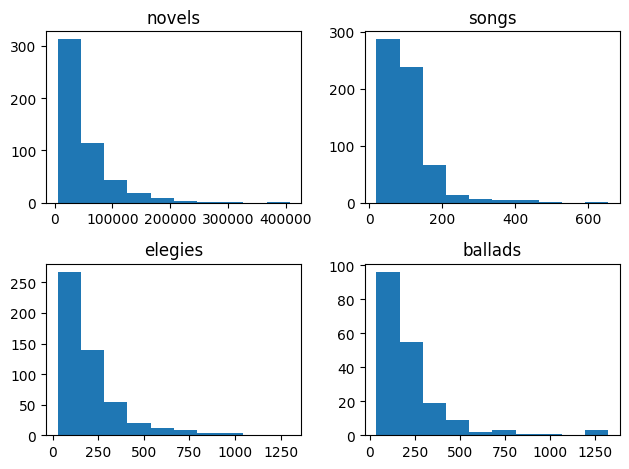

In [84]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)
#fig.suptitle('text length distribution')
axs[0,0].hist(df['text_len'].where(df['genre'] == 'novels'))
axs[0,0].set_title('novels')
axs[0,1].hist(df['text_len'].where(df['genre'] == 'songs'))
axs[0,1].set_title('songs')
axs[1,0].hist(df['text_len'].where(df['genre'] == 'elegies'))
axs[1,0].set_title('elegies')
axs[1,1].hist(df['text_len'].where(df['genre'] == 'ballads'))
axs[1,1].set_title('ballads')
fig.tight_layout()
plt.savefig('len_distribution')
plt.show()

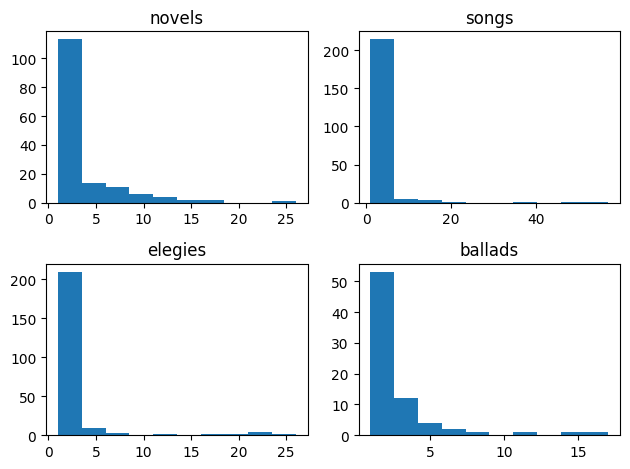

In [85]:
from collections import Counter
import numpy as np
fig, axs = plt.subplots(2, 2)
#fig.suptitle('number of novels/poems written by one author')
author_work = Counter(df['author'].where(df['genre'] == 'novels').dropna())
counts, bins = np.histogram(np.fromiter(author_work.values(), dtype=float))
axs[0,0].hist(bins[:-1], bins, weights=counts)
axs[0,0].set_title('novels')
author_work = Counter(df['author'].where(df['genre'] == 'songs').dropna())
counts, bins = np.histogram(np.fromiter(author_work.values(), dtype=float))
axs[0,1].hist(bins[:-1], bins, weights=counts)
axs[0,1].set_title('songs')
author_work = Counter(df['author'].where(df['genre'] == 'elegies').dropna())
counts, bins = np.histogram(np.fromiter(author_work.values(), dtype=float))
axs[1,0].hist(bins[:-1], bins, weights=counts)
axs[1,0].set_title('elegies')
author_work = Counter(df['author'].where(df['genre'] == 'ballads').dropna())
counts, bins = np.histogram(np.fromiter(author_work.values(), dtype=float))
axs[1,1].hist(bins[:-1], bins, weights=counts)
axs[1,1].set_title('ballads')
fig.tight_layout()
plt.savefig('novels_poems_per_author')
plt.show()

In [31]:
import pickle

with open('authors.pickle', 'wb') as f:
    pickle.dump(authors, f)